# **Wine Tasting Dataset model**
### Created by Phebe Le - S2 Networking and Cybersecurity

### 1. Load data from Google Drive

In [240]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import required libraries

In [241]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [291]:
import pandas as pd
import numpy as np
import seaborn as sb
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, recall_score
from matplotlib import rcParams
import seaborn as sns

### 3. Link the dataset to Google Drive

In [243]:
wine_dataset = pd.read_csv('/content/drive/MyDrive/networking/wine_testing_dataset/Wine_Taste_dataset.csv')

### 4. Data Cleaning

Data cleaning is an integeral part of the subprocess before the building and training of a model. By cleaning, it helps to reduce overfitting, remove outliers and reduce the likelihood of inaccurate accuracy

In [244]:
# View the first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


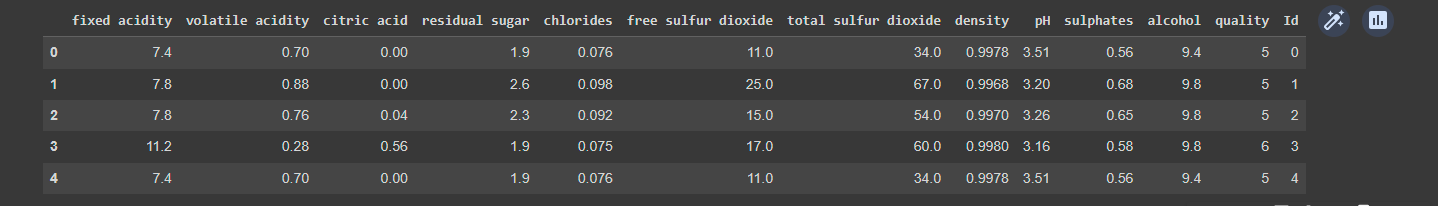

From this we can tell that most of the data is relatively clean. Yet it still lacks the qualities that would make it completely clean.

- Dirty data refers to duplicate, incomplete, or outdated data.
-  Whilst we are unable to see if if the data is outdated, and incomplete (through this view), there are several duplicate data entries (eg. row 0 and 4).
As a result, data cleaning will need to be conducted

In [245]:
# check to see how many rows and columns are in the data set
wine_dataset.shape

(1143, 13)

In [246]:
# check if the model contains any missing data.
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

From the output (that shows 0's), the model contains no missing data.

Yet, if the data did contain missing data and it was a small number, deletion through the phrase
```
wine_dataset.dropna()
wine_dataset.isnull().sum()
```
- it should then output 0's to show that there is no missing data

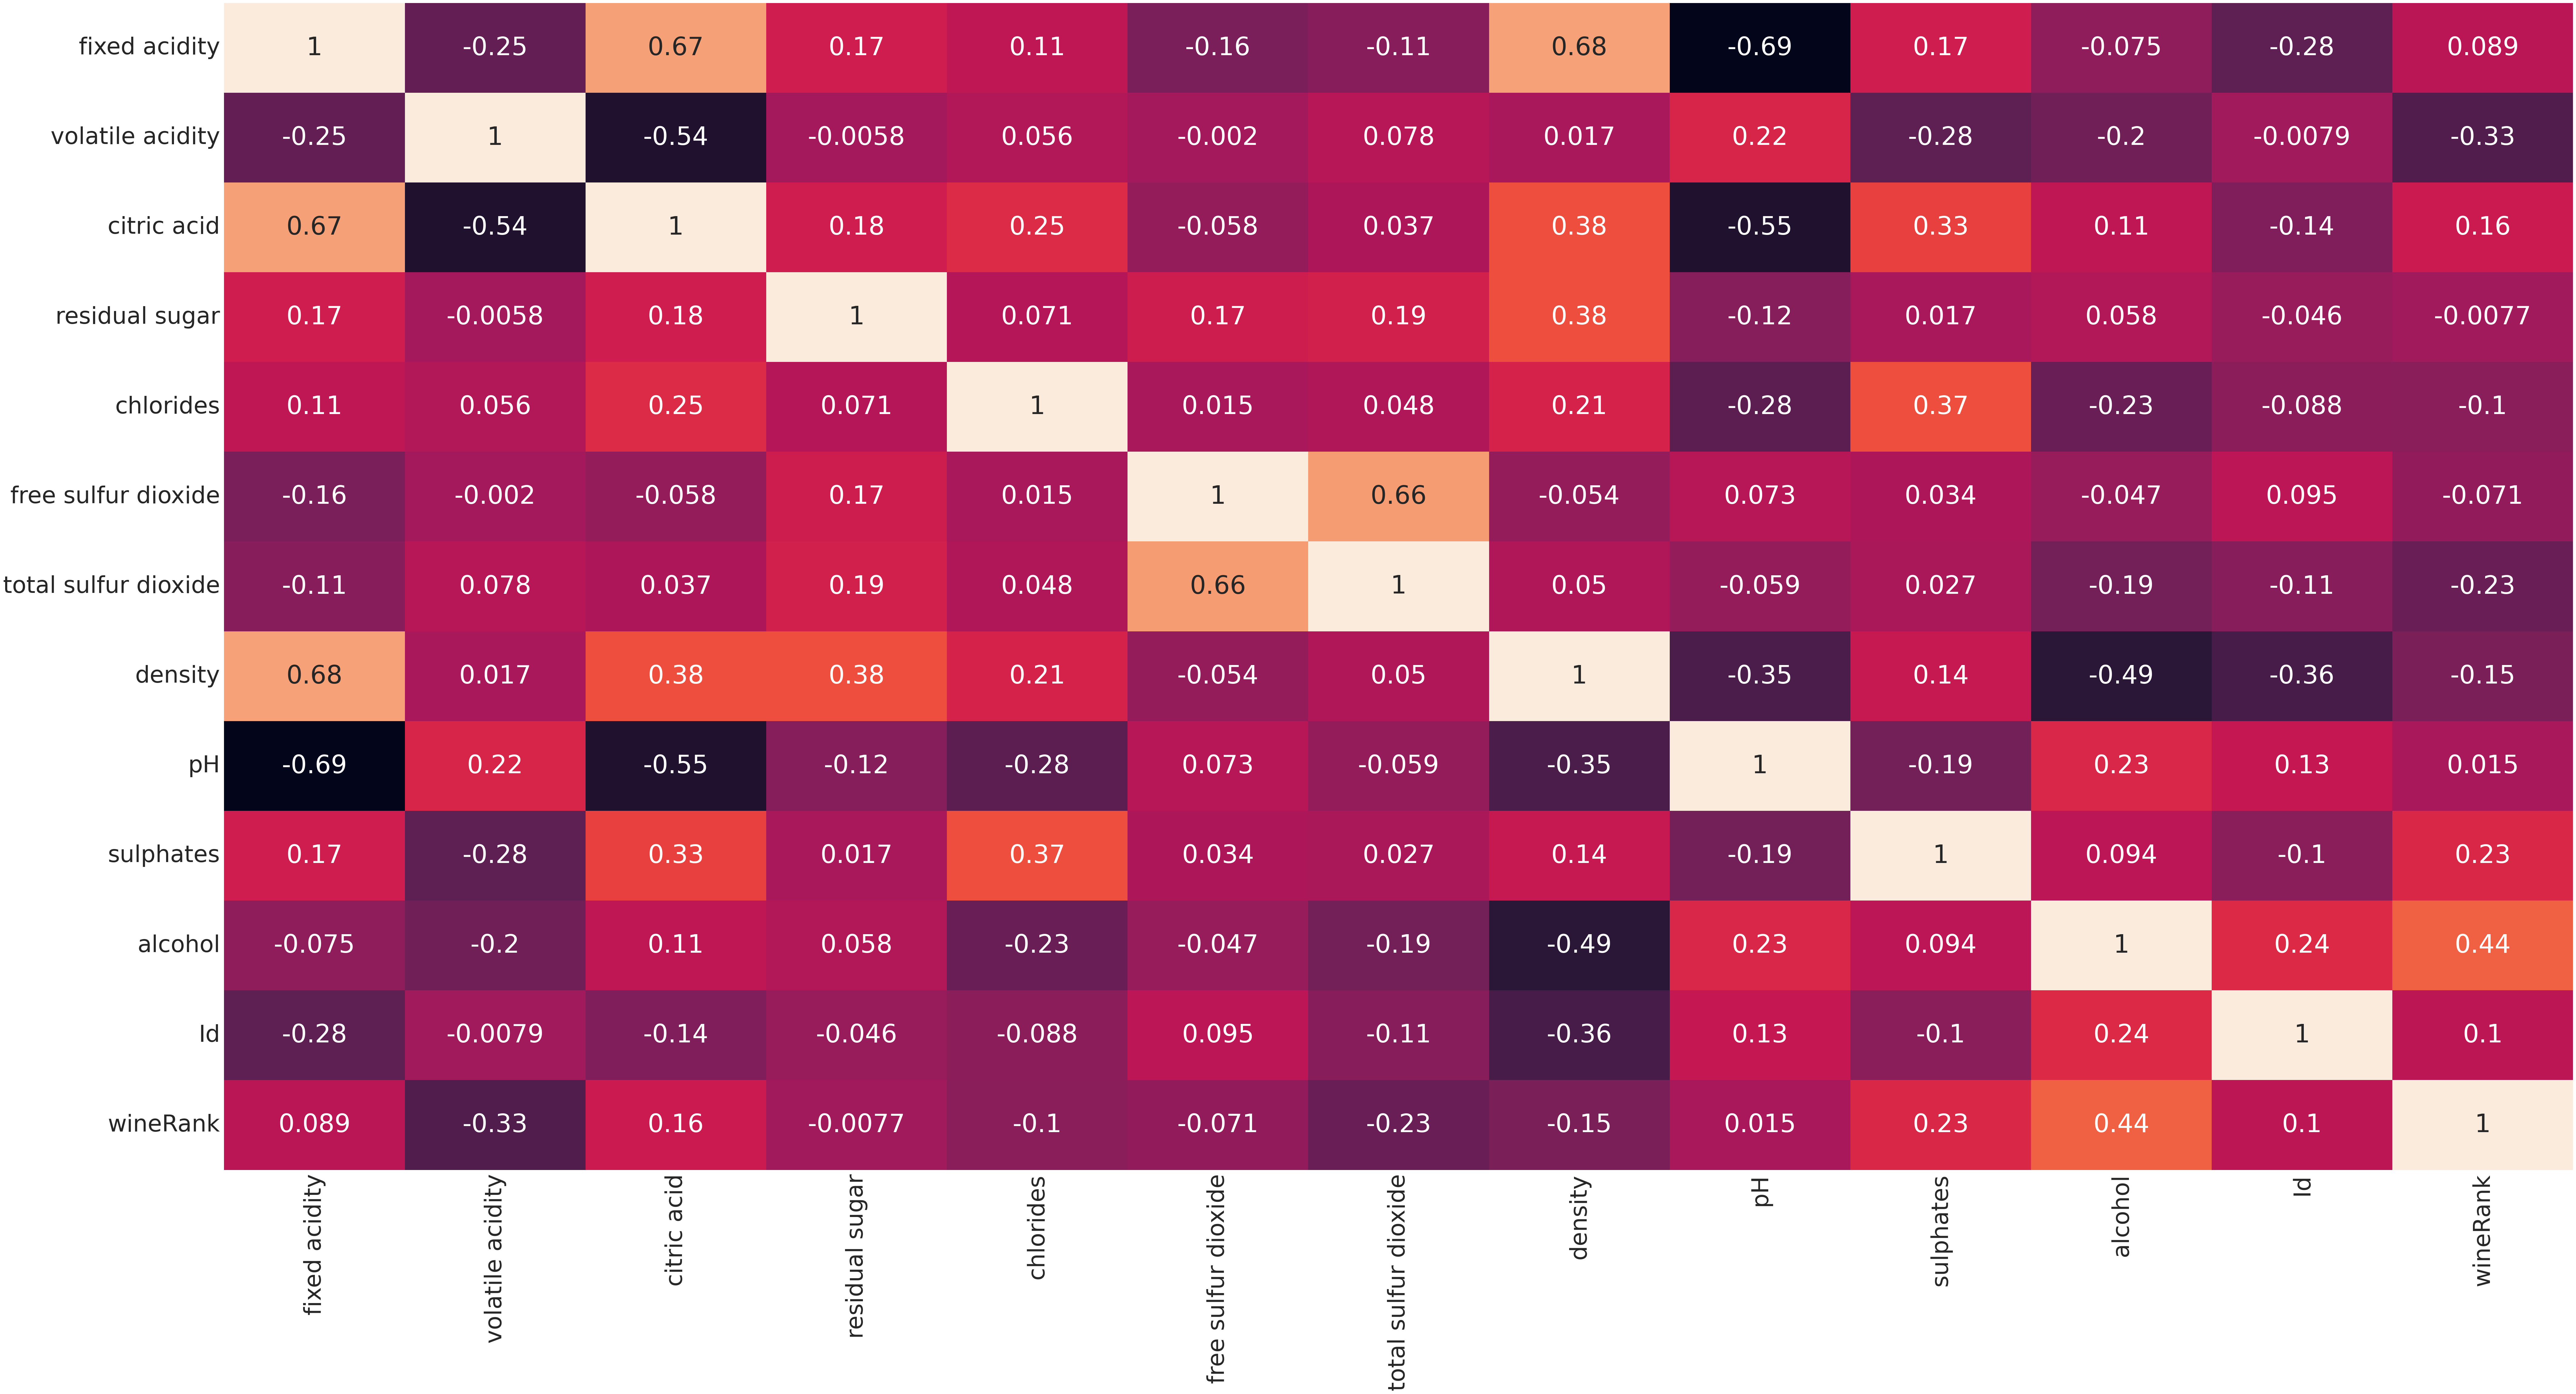

In [290]:
# this is to check if there are any highly correlated data (if there is, it will have to be dropped)
# there is not! only one white diagonal with one is what is expected!
plt.subplots(figsize=(100, 50))
sb.heatmap(wine_dataset.corr(), annot=True, cbar=False)
plt.show()

Through this heatmap, we can see that the strongest output categories for the input category( alcohol) will be sulphates, citric acid and fixed acidity

### 5. Conversion to a Binary classification

- here the input will be the quality category and this will be used to classify if a wine is good or bad quality

#### Understanding the Input column

In [248]:
# print the variable count for the target variable
wine_dataset['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

Reading from the bottom up, the wines are classified from 3 - 8. This means that the quality range is in between these numbers.

Hence, this means that when biunary classification occurs, wines that are greater than 5 will be considered a good wine, whilst those below it will be considered a bad wine.

#### Binary classification of the output

First step: using the output columns and the input column (quality) to create a column that classifies if the wine is good or not.

The expected result is a column that shows 0's and 1's depending on if they're good or not


In [250]:
wine_dataset['test_good_wine']= pd.qcut(wine_dataset['quality'], q=2 , labels = [0,1]).value_counts()
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,test_good_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,984.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,159.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,NaN


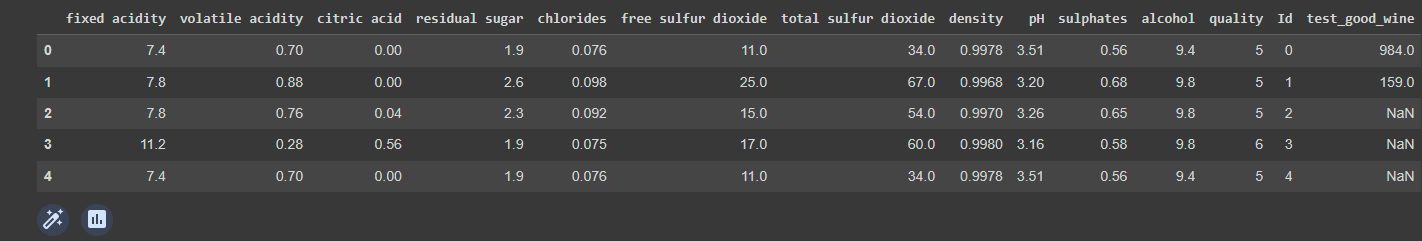

This was not the  output that was supposed to occur, as a result, I will try another way

Here direct specification to the binary column is portrayed through and if, else statement

In [251]:
wine_dataset['wineRank'] = [1 if quality > 5 else 0 for quality in wine_dataset['quality']]
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,test_good_wine,wineRank
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,984.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,159.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,NaN,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,NaN,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,NaN,0


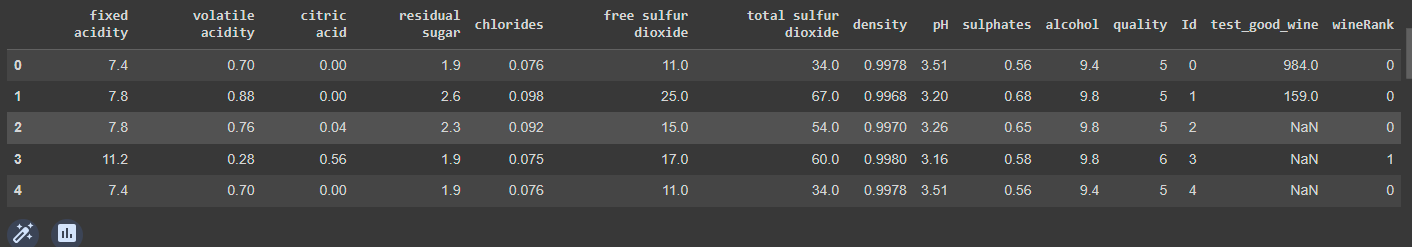

This is significantly better now, there are  binary numbers being shown instead of ASCII and extremely large numbers.

2nd step: Check the number of good and bad values to make sure it looks relatively even (due to middle split x => 5 or x < 5)

In [252]:
# check the number of good and bad wines
wine_dataset['wineRank'].value_counts()

1    621
0    522
Name: wineRank, dtype: int64

This is the correct type of output for both of the columns

#### Dropping unrequired data classes (columns)
-  this is done to reduce all unecessary data in the dataset. This will help to increase the speed during testing and training

In [253]:
wine_dataset.drop('quality', axis = 1, inplace = True)

In [254]:
# wine_dataset.drop('Id', axis = 1, inplace = True)
wine_dataset.drop('test_good_wine', axis = 1, inplace= True)
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id,wineRank
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4,0


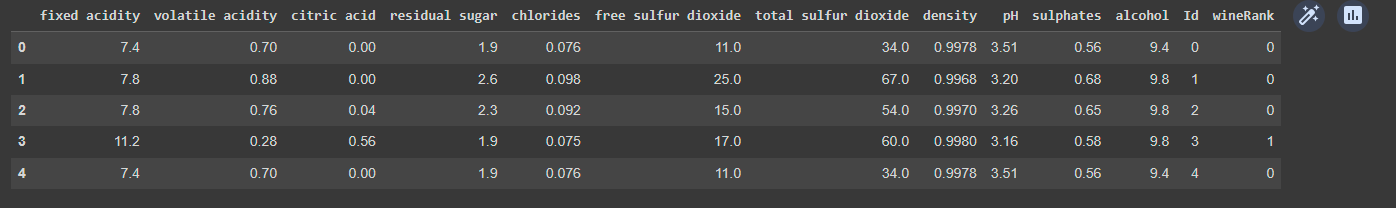

### 6. Splitting the dataset

In [255]:
# start by creating a new variable for the binary column
X = wine_dataset.drop('wineRank', axis = 1)
y = wine_dataset['wineRank']

In [256]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id,wineRank
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4,0


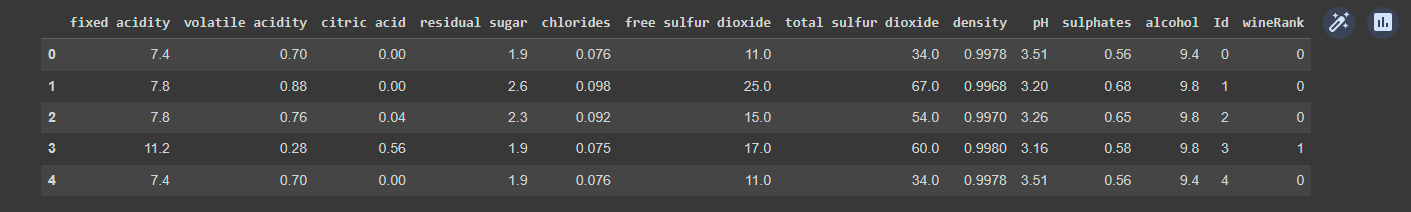

In [257]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7, random_state = 34)

Splitting it intro 4 sets, where the test size is 40 and a random seed to ensure the numbers are the same everytime the code is run

X_train.shape = Is for all the independent variables, these will be used to train the model. By defining the test_size as 0.70, it means 30% of the data will be used to train/fit the model

X_test = the remaining 70% will be used to test the model

y_train = the dependent tvariable that needs to be predicted by the future model (eg. category labels against X)

y_test = data that has category tables for test data, used to test accuracy between predicted and actual categories



In [258]:
X_train.shape, X_test.shape

((800, 12), (343, 12))

### 7. Normalisation
- aka Data Scaling

Normalisation is the methodology of arranging or manipulating the data to reduce a skewed result from abnormaly large data to extremely small data. If this sort of data is left in the model, the neural network will view the data as it is and view a feature on a higher level compared to others.

In [259]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
269,7.7,0.51,0.28,2.1,0.087,23.0,54.0,0.99800,3.42,0.74,9.2,384
813,10.0,0.41,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.8,1147
815,10.0,0.35,0.47,2.0,0.061,6.0,11.0,0.99585,3.23,0.52,12.0,1149
349,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,495
675,9.0,0.36,0.52,2.1,0.111,5.0,10.0,0.99568,3.31,0.62,11.3,956


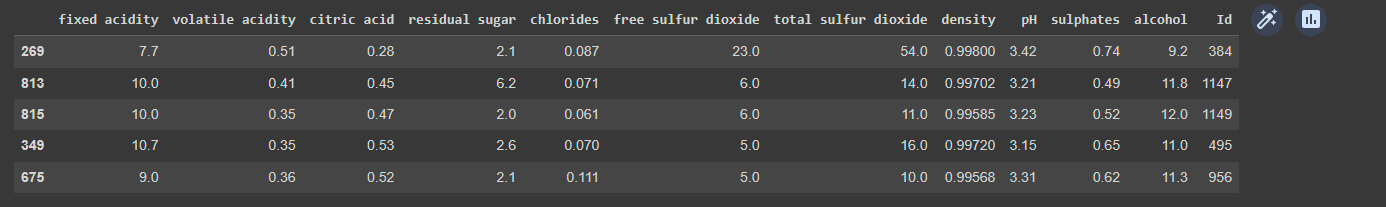

From this dataset, different features show a range of values ranging from 0.99... in 'density' to 44 in 'total sulfur dioxide'. Which is not good for the development of the model later on. So this will be removed through Normalisation.

To do this, a standard scaler will be used to fit and transform the data as well as apply this infomation to the testing data



In [260]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [261]:
X_train_scaled[:3]

array([[-0.36144963, -0.14271662,  0.06896981, -0.3452305 , -0.0264154 ,
         0.70006872,  0.22409747,  0.63159506,  0.73084007,  0.45345512,
        -1.14738112, -0.87474647],
       [ 0.96154087, -0.72807061,  0.93587316,  2.65438814, -0.35309861,
        -0.96515814, -1.0029934 ,  0.11534071, -0.62436006, -0.96138146,
         1.32129628,  0.75401928],
       [ 0.96154087, -1.079283  ,  1.03786179, -0.41839193, -0.55727562,
        -0.96515814, -1.09502522, -0.50100378, -0.49529338, -0.79160107,
         1.51119454,  0.75828865]])

Show the first 3 arrays of the scaled rows

### Model Training
- for this classification model: 3 aspects will be created
  - Output layer structure: this will contain one neuron activated byu a sigmoid function
    - This will help to output a probability that can be assigned to a good or bad wine
  - Loss function: for this, binary cross entropy will be used as there are two categories
  - Class balence: usually this part should contain the modification of the binary values (if the data isn't even) but since it is even, precision and recall will be used to further balence the catagory
  

In [262]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

In [263]:
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name ='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name ='recall')
    ]
)

Start the training performance by using scaled data. This is created through a variable for easy referencing later on

In [264]:
history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 5s 11ms/step - loss: 0.5776 - accuracy: 0.6975 - precision: 0.7162 - recall: 0.7455
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.5265 - accuracy: 0.7613 - precision: 0.7902 - recall: 0.7705
Epoch 3/100
25/25 [==============================] - 0s 11ms/step - loss: 0.4824 - accuracy: 0.7788 - precision: 0.7955 - recall: 0.8045
Epoch 4/100
25/25 [==============================] - 0s 13ms/step - loss: 0.4718 - accuracy: 0.7875 - precision: 0.7897 - recall: 0.8364
Epoch 5/100
25/25 [==============================] - 0s 9ms/step - loss: 0.4657 - accuracy: 0.7962 - precision: 0.7966 - recall: 0.8455
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4863 - accuracy: 0.7837 - precision: 0.7896 - recall: 0.8273
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4877 - accuracy: 0.7925 - precision: 0.8100 - recall: 0.8136
Epoch 8/100
25/25 [==========================

### 8. Graphing the results

In [265]:
rcParams['figure.figsize'] = (18,8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

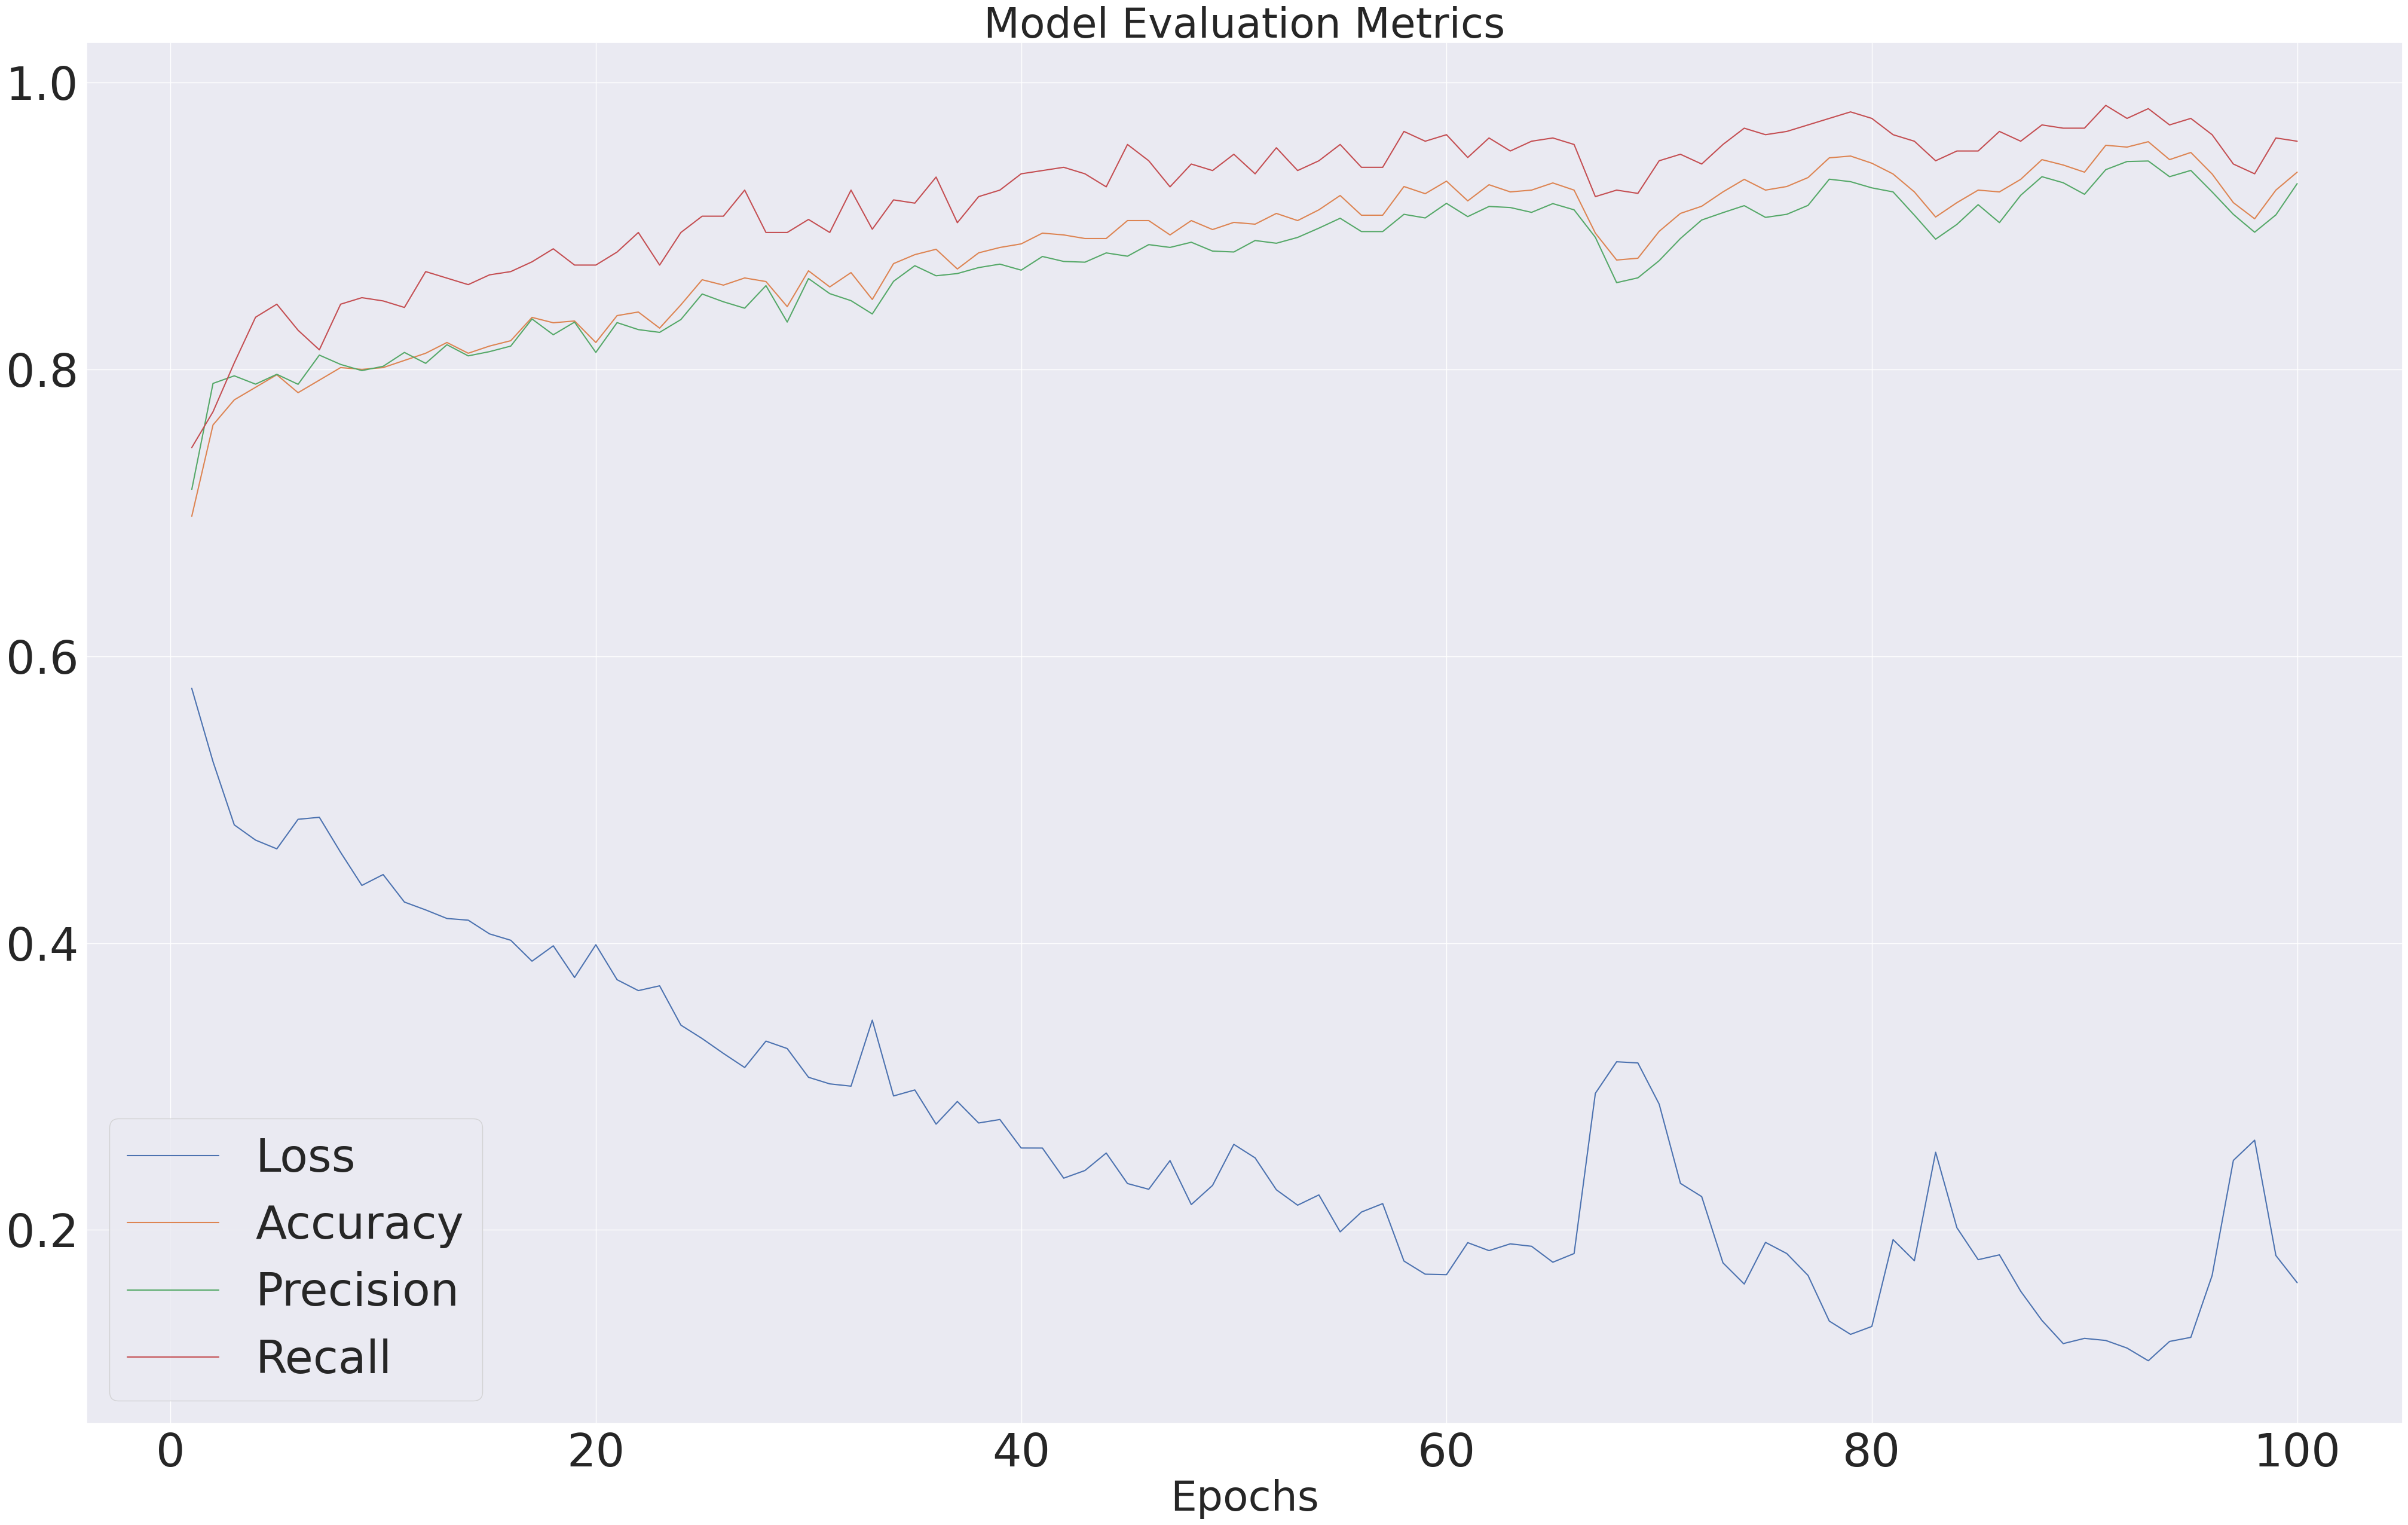

In [292]:
plt.subplots(figsize=(50,30))
plt.plot(np.arange(1,101), history.history['loss'], label = 'Loss')
plt.plot(np.arange(1,101), history.history['accuracy'], label = 'Accuracy')
plt.plot(np.arange(1,101), history.history['precision'], label = 'Precision')
plt.plot(np.arange(1,101), history.history['recall'], label = 'Recall')
plt.title('Model Evaluation Metrics', size= 50)
plt.xlabel('Epochs', size=50)
plt.legend()

The accuracy, precsion and recall within this graph are extermely similar to each other, and it might be a result of overfitting, so testing for this will occur

#### Testing for Overfitting

This is done by using probabiliy predictions on the scale test data

In [267]:
predictions = model.predict(X_test_scaled)

11/11 [==============================] - 0s 2ms/step


##### Show predictions through array

In [268]:
predictions

array([[1.00000000e+00],
       [9.46098506e-01],
       [9.99944985e-01],
       [8.89745891e-01],
       [9.89163399e-01],
       [9.57349896e-01],
       [2.75641065e-02],
       [9.99963820e-01],
       [7.40029752e-01],
       [1.53789551e-10],
       [2.19176640e-03],
       [1.00000000e+00],
       [6.37294351e-09],
       [9.99976814e-01],
       [9.95615363e-01],
       [9.99973059e-01],
       [9.23323780e-02],
       [3.57542560e-03],
       [6.77723289e-01],
       [9.97219265e-01],
       [9.99975443e-01],
       [9.51170921e-01],
       [9.99142945e-01],
       [7.69834518e-01],
       [1.00000000e+00],
       [4.92571900e-03],
       [1.00000000e+00],
       [2.02665819e-06],
       [1.13083115e-05],
       [3.43010435e-03],
       [1.68101955e-02],
       [9.39601019e-09],
       [8.24653208e-01],
       [9.99866486e-01],
       [1.36828058e-11],
       [9.99999940e-01],
       [8.71874869e-01],
       [9.99630988e-01],
       [1.00000000e+00],
       [1.55306225e-05],


##### Convert the predictions into classes

In [269]:
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]

- if the probability is greater than 0.5 then assign 1 (a good line) else display a 0

In [270]:
# show the first 20
prediction_classes[:20]

[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

## Evaluation of data

- print a confusion matrix to see the types of results from the test

In [271]:
print(confusion_matrix(y_test, prediction_classes))

[[104  58]
 [ 30 151]]


From this data we can tell that there was
- 104 correct positives
- 58 false positive
- 30 false negatives
- 151 correct negatives

In [272]:
_accuracy = model.evaluate( X_test_scaled)
print(_accuracy)

11/11 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
[0.0, 0.0, 0.0, 0.0]


In [273]:
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.74
Precision: 0.72
Recall: 0.83
